# ヒープ

## ヒープ：問題にチャレンジする前に


アルゴリズム図鑑（有料）

## 完全二分木


問題：[ALDS1_9_A](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/9/ALDS1_9_A) (Complete Binary Tree)

In [ ]:
%%writefile input.dat
5
7 8 1 2 3

教科書では，ヒープを1オリジンの配列で表そうとしている。CやC++の配列は0オリジンだから，先頭要素を使わないことで，1オリジンを実現する。ここでもその方法を使う。先頭要素はNoneや空文字列にする。

In [ ]:
%%writefile test.py
def parent(i): return i // 2
def left(i): return 2 * i
def right(i): return 2 * i + 1

H = int(input())
A = [None] + list(map(int, input().split()))

for i in range(1, H + 1):
  key = A[i]
  print(f'node {i}: {key = }, ', end='')
  # 自分で書く

In [ ]:
!python3 test.py < input.dat

## 最大・最小ヒープ


問題：[ALDS1_9_B](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/9/ALDS1_9_B) (Maxiumum Heap)

In [1]:
%%writefile input.dat
10
4 1 3 2 16 9 10 14 8 7

Writing input.dat


> Google Colabでクラス図を描くコード<br>（ここにコードを貼り付ける）

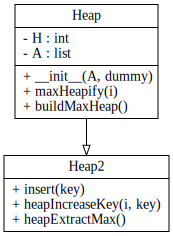

In [2]:
from graphviz import Digraph

dot = Digraph(format='png')
dot.attr('node', shape='record')

# Heap クラス
dot.node('Heap', '''{ Heap |
  - H : int\\l
  - A : list\\l|
  + __init__(A, dummy)\\l
  + maxHeapify(i)\\l
  + buildMaxHeap()\\l
}''')

# Heap2 クラス
dot.node('Heap2', '''{ Heap2 |
  + insert(key)\\l
  + heapIncreaseKey(i, key)\\l
  + heapExtractMax()\\l
}''')

# 継承関係
dot.edge('Heap', 'Heap2', arrowhead='onormal')

# 表示
dot.render('heap_class_diagram', view=True)
dot

`A`と`H`をグローバル変数にするとプログラム中で一つしかヒープを作れなくてよくない。そこで，ヒープのためのクラスheapを作る。ヒープの実体であるリストを`self.A`とするのは面倒だから，メソッドの最初の方で`A = self.A`とする。

In [ ]:
%%writefile test.py
def parent(i): return i // 2
def left(i): return 2 * i
def right(i): return 2 * i + 1

class Heap:
  def __init__(self, A, dummy=''):
    self.H = len(A)
    self.A = [dummy] + A

  def maxHeapify(self, i):
    l = left(i)
    r = right(i)
    largest = i
    if l <= self.H and self.A[l] > self.A[largest]:
      largest = l
    if r <= self.H and self.A[r] > self.A[largest]:
      largest = r
    if largest != i:
      self.A[i], self.A[largest] = self.A[largest], self.A[i]
      self.maxHeapify(largest)

  def buildMaxHeap(self):
    for i in range(self.H // 2, 0, -1):
      self.maxHeapify(i)

H = int(input())
A = list(map(int, input().split()))
heap = Heap(A)
heap.buildMaxHeap()
print(*heap.A)

In [ ]:
!python3 test.py < input.dat

## 優先度付きキュー


問題：[ALDS1_9_C](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/9/ALDS1_9_C) (Priority Queue)

In [ ]:
%%writefile input.dat
insert 8
insert 2
extract
insert 10
extract
insert 11
extract
extract
end

### ライブラリを使う場合


heapqを使う。ただし，heapqは最小ヒープだから，最大ヒープにするために値に $(-1)$ を掛けて格納する。取り出すときに $(-1)$ を掛けて元に戻す。

In [ ]:
%%writefile test.py
import heapq

heap = []

while True:
  com = input().split()
  if com[0] == 'insert': heapq.heappush(heap, -int(com[1]))
  elif com[0] == 'extract': print(-heapq.heappop(heap))
  elif com[0] == 'end': break

In [ ]:
!python3 test.py < input.dat

### ライブラリを使わない場合


先に作ったHeapを継承したHeap2を作り，要素を挿入する`insert`，指定した要素を持ち上げる`heapIncreaseKey`，最大値を取り出す`heapExtractMax`を実装する。

In [ ]:
%%writefile test.py
def parent(i): return i // 2
def left(i): return 2 * i
def right(i): return 2 * i + 1

# Heapの定義（前問）

class Heap2(Heap):
  def insert(self, key):
    self.H += 1
    self.A.append(key)
    self.heapIncreaseKey(self.H, key)

  def heapIncreaseKey(self, i, key):
    A = self.A
    # if key < A[i]: return # ここではチェックは不要
    A[i] = key
    # 自分で書く

  def heapExtractMax(self):
    # 自分で書く

heap = Heap2([])

while True:
  com = input().split()
  if com[0] == 'insert': heap.insert(int(com[1]))
  elif com[0] == 'extract': print(heap.heapExtractMax())
  elif com[0] == 'end': break

In [ ]:
!python3 test.py < input.dat

## おまけ

### その1：ヒープソート


アルゴリズム図鑑

次のような手順で，ヒープを使って整列する。平均時間計算量は $O(n \log n)$ ，平均空間計算量は $O(1)$ である。

1.  ヒープを作る。
2.  ヒープの最大値を取り出して，リストの末尾に置く。
3.  ヒープのサイズを1つ小さくして，ヒープを再構築する。
4.  ヒープのサイズが1になるまで2と3を繰り返す。

### その2：伏線回収


いろんなことを学んできた。

教科書p.41の問題（Top N）の解法，今なら何個思い付くだろうか。最大ヒープは使えるか。最小ヒープは使えるか。例えば6個思い付くなら，次のようにAIでコードを書いて実験してみよう。参考：https://docs.python.org/ja/3.13/library/heapq.html

> 0以上k以下のランダムな整数n個から最も小さいm個を取り出す。次の6個の方法の時間を比較するPythonのコード。<br>① 自分で書く<br>② 自分で書く<br>③ 自分で書く<br>④ 自分で書く<br>⑤ 自分で書く<br>⑥ 自分で書く<br>結果が等しくない場合はエラーメッセージを出して

## 宿題


以下の問題をAC（Accepted）にする。Pythonを使うこと。

-   [ALDS1_9_A](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/9/ALDS1_9_A) (Complete Binary Tree)
-   [ALDS1_9_B](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/9/ALDS1_9_B) (Maxiumum Heap)
-   [ALDS1_9_C](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/9/ALDS1_9_C) (Priority Queue)

以上